# Introduction

The purpose of this notebook is to train a ML model to predict a consumer's chances of being a approved for a loan. The data for this project was graciously provided by a cooperating financial institution, and any identifying information was removed prior to use. Only data for consumer loans was available, so the final model will not be able to predict an individual's odds of obtaining financing for a mortgage or commercial loan. This dataset was cleaned in a previous notebook where EDA was performed.

There are several sections to this notebook. First, an initial check is done to verify that there are no missing values. Next, transformations are performed on the data to prepare it for input to a ML model. Several features are then added. Once the data is fully prepared, several models are trained and evaluated. The best performing model is saved, and will later be used to predict chances of loan approval in a web app. 

# Check Data Quality

In [1]:
# data 
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_consumer_loans.csv')
df.head()

,Unnamed: 0,loan product,status,amount approved,amount requested,approved rate,annual income,credit score,monthly housing,monthly income,monthly other income,monthly payment requested,monthly payment decision,monthly tradeline debt
0,0,Unsecured/Signature,0,0.0,1000.0,0.0,18000.0,746.0,0.0,1500.0,1500.0,88.38,0.0,512.0
1,1,VISA Consumer 9.95,0,0.0,300.0,0.0,33600.0,0.0,0.0,2800.0,0.0,0.00,0.0,0.0
2,2,VISA Consumer 9.95,0,0.0,11450.0,0.0,48000.0,569.0,0.0,4000.0,0.0,0.00,0.0,1187.0
3,3,RV,0,0.0,30000.0,0.0,27600.0,734.0,442.0,2300.0,0.0,0.00,0.0,293.0
4,4,Unsecured/Signature,0,0.0,7500.0,0.0,19800.0,0.0,0.0,1650.0,250.0,0.00,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1202 non-null   int64  
 1   loan product               1202 non-null   object 
 2   status                     1202 non-null   int64  
 3   amount approved            1202 non-null   float64
 4   amount requested           1202 non-null   float64
 5   approved rate              1202 non-null   float64
 6   annual income              1202 non-null   float64
 7   credit score               1202 non-null   float64
 8   monthly housing            1202 non-null   float64
 9   monthly income             1202 non-null   float64
 10  monthly other income       1202 non-null   float64
 11  monthly payment requested  1202 non-null   float64
 12  monthly payment decision   1202 non-null   float64
 13  monthly tradeline debt     1202 non-null   float

In [4]:
df.describe()

,Unnamed: 0,status,amount approved,amount requested,approved rate,annual income,credit score,monthly housing,monthly income,monthly other income,monthly payment requested,monthly payment decision,monthly tradeline debt
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1.202000e+03,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,600.500000,0.363561,7233.313128,14882.950507,0.020465,3.887629e+04,419.443428,485.217196,3239.690773,165.272720,181.768353,96.259867,393.426639
std,347.131819,0.481224,16294.308165,24196.787248,0.034151,5.399740e+04,321.220114,2651.232560,4499.783056,785.377776,711.106278,193.490080,737.550896
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,300.250000,0.000000,0.000000,2000.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,600.500000,0.000000,0.000000,7000.000000,0.000000,3.120000e+04,585.500000,231.000000,2600.000000,0.000000,0.000000,0.000000,35.000000
75%,900.750000,1.000000,5327.570000,20000.000000,0.037500,5.200000e+04,677.000000,700.000000,4333.333000,0.000000,150.000000,91.960000,442.440000
max,1201.000000,1.000000,132000.000000,375000.000000,0.180000,1.200000e+06,840.000000,90000.000000,100000.000000,13700.000000,14201.390000,1403.280000,5510.000000


# Transforming Data

I want to narrow down the features to a list of inputs an end user could easily provide: loan category (auto, boat, personal, or credit card'), amount, monthly income, rent/mortgage payment, and tradeline debt.

In [5]:
drop_cols = ['Unnamed: 0', 'amount approved', 'approved rate', 'annual income', 'monthly payment requested',\
             'monthly payment decision']
df.drop(columns=drop_cols, axis=1, inplace=True)

df.rename({'amount requested': 'amount', 'monthly housing': 'rent', 'monthly other income': 'other income', 'monthly tradeline debt': 'debts'}, axis=1, inplace=True)

df.head()

,loan product,status,amount,credit score,rent,monthly income,other income,debts
0,Unsecured/Signature,0,1000.0,746.0,0.0,1500.0,1500.0,512.0
1,VISA Consumer 9.95,0,300.0,0.0,0.0,2800.0,0.0,0.0
2,VISA Consumer 9.95,0,11450.0,569.0,0.0,4000.0,0.0,1187.0
3,RV,0,30000.0,734.0,442.0,2300.0,0.0,293.0
4,Unsecured/Signature,0,7500.0,0.0,0.0,1650.0,250.0,0.0


In [6]:
df['loan product'].value_counts()

Auto                       458
Unsecured/Signature        239
Boat                       114
Personal Line of Credit     77
Ready Cash                  62
Credit Builder              54
VISA Consumer 12.95         48
VISA Secured                43
VISA Consumer 9.95          35
Recreational Toys           28
RV                          19
CD Secured                  11
Boat - Variable              9
Share Secured                3
CD Secured (Balloon)         2
Name: loan product, dtype: int64

I'm going to remove the Share Secured and CD Secured loans from the dataset. These are not loan products that the average consumer would be interested in and belong in a category of their own. The rest of the loan products will be binned into four categories: personal, credit card, auto, and recreational.

In [7]:
def cat_loans(row):
    if row['loan product'] in ['Unsecured/Signature', 'Personal Line of Credit', 'Ready Cash', 'Credit Builder']:
        return 'unsecured'
    elif row['loan product'] in ['VISA Consumer 9.95', 'VISA Secured', 'VISA Consumer 12.95']:
        return 'credit card'
    elif row['loan product'] in ['Recreational Toys', 'RV', 'Boat', 'Boat - Variable']:
        return 'recreational'
    elif row['loan product'] == 'Auto':
        return 'auto'
    else:
        return row['loan product']
    
df['loan product'] = df.apply(lambda row: cat_loans(row), axis=1)

df.drop(df[df['loan product']=='Share Secured'].index, inplace=True)
df.drop(df[df['loan product']=='CD Secured (Balloon)'].index, inplace=True)
df.drop(df[df['loan product']=='CD Secured'].index, inplace=True)


df['loan product'].value_counts()

auto            458
unsecured       432
recreational    170
credit card     126
Name: loan product, dtype: int64

In [8]:
# round credit score to nearest hundred
df['credit score'] = df['credit score'].apply(lambda x: round(x/100)*100)
df.head()

,loan product,status,amount,credit score,rent,monthly income,other income,debts
0,unsecured,0,1000.0,700,0.0,1500.0,1500.0,512.0
1,credit card,0,300.0,0,0.0,2800.0,0.0,0.0
2,credit card,0,11450.0,600,0.0,4000.0,0.0,1187.0
3,recreational,0,30000.0,700,442.0,2300.0,0.0,293.0
4,unsecured,0,7500.0,0,0.0,1650.0,250.0,0.0


# Add Features

In [9]:
# add features
df['has debts'] = np.where(df['debts'] > 0, 1, 0)
df['pays rent'] = np.where(df['rent'] > 0, 1, 0)
df['has credit'] = np.where(df['credit score'] > 0, 1, 0)

def calculate_dti(row):
    debt = row['debts']
    income = row['monthly income'] + row['other income']
    if income == 0:
        return 100
    else:
        return round(debt/income*100, 2)

df['dti'] = df.apply(lambda row: calculate_dti(row), axis=1)

# encode loan products
df['loan product'].replace({'unsecured': 1, 'credit card': 2, 'auto': 3, 'recreational': 4}, inplace=True)

# Scaling and Splitting

The data now contains all the features I want to train the model. Before feeding it into the algorithms, the data needs to be scaled and split. The target feature, "Status", is removed from the rest of the features. The data is then split into training, validation, and testing sets. The use of validation and test sets allows me to compare different models' performance and still have a fresh subset of data to evaluate the final model with. 

The non-categorical features are scaled between 0 and 1 using the MinMax Scaler from Sklearn. This makes brings all of the features into a more similar range so that features with larger numbers, such as the loan amount, do not overshadow smaller features (debt, rent, etc).

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

target = 'status'
feature_cols = [col for col in df.columns if col != target]
features = df[feature_cols]
target = df[target]

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

# split train dataset into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

# scale data
scaler = MinMaxScaler(feature_range=(0,1))
cols = ['amount', 'credit score', 'rent', 'monthly income', 'other income', 'debts']

x_train[cols] = scaler.fit_transform(x_train[cols])
x_val[cols] = scaler.transform(x_val[cols])
x_test[cols] = scaler.transform(x_test[cols])

# convert to numpy arrays
x_train = np.array(x_train)
x_val = np.array(x_val)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Model Training & Evaluation

## Performance Metrics

Accuracy, precision, and f1 will be used as performance metrics. I will prioritize f1 and precision. The goal is to establish high predictive accuracy with minimal false positives. The reason behind this is that if a person has a false positive and chooses to apply for a loan, they may dent their credit score without any benefit. f1 will be prioritized to prevent a large number of false negatives, but in the event that two models tie for the best f1 score, precision will be used as the tie breaker. Accuracy will also be taken into consideration.

In [11]:
# import dependencies for evaluating models
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold


metrics = []
confusion_matrices = []

# Model Training

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import tensorflow as tf
import keras

# initialize ANN
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=12, activation='relu', input_shape=x_train[0].shape))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = [keras.metrics.Precision()])

# initialize sklearn classifiers and store in list, add ann
classifiers = [LogisticRegression(penalty='l2', random_state=42, solver='liblinear'), \
              RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, \
                                     min_samples_split=2, random_state=42), 
              GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, criterion='friedman_mse', \
                                         min_samples_split=2, random_state=42),\
              AdaBoostClassifier(n_estimators=100, learning_rate=.9, random_state=42),
              ann]

# train classifiers
for clf in classifiers:
    # if statement to handle predictions generated by ANN 
    if type(clf).__name__ == 'Sequential':
        # train ANN
        clf.fit(x_train, y_train, batch_size=32, epochs=100)
        # make predictions
        preds = clf.predict(x_val)
        # round predictions and convert to single numpy array
        preds = [np.round(pred) for pred in preds]
        preds = np.concatenate(preds, axis=0)
        preds = [int(pred) for pred in preds]
        preds = np.array(preds)
        # save metrics
        f1 = f1_score(y_val, preds)
        precision = precision_score(y_val, preds)
        accuracy = accuracy_score(y_val, preds)
        scores = {'model': 'ANN', 'f1': f1, 'precision': precision, 'accuracy': accuracy}
        metrics.append(scores)
        # save confusion matrix
        cm = confusion_matrix(y_val, preds)
        confusion_matrices.append(('ANN', cm))
        
    else:
        # train classifier
        clf.fit(x_train, y_train)
        # make predictions
        preds = clf.predict(x_val)
        # save metrics
        f1 = f1_score(y_val, preds)
        precision = precision_score(y_val, preds)
        accuracy = accuracy_score(y_val, preds)
        scores = {'model': type(clf).__name__, 'f1': f1, 'precision': precision, 'accuracy': accuracy}
        metrics.append(scores)
        # save confusion matrix
        cm = confusion_matrix(y_val, preds)
        confusion_matrices.append((type(clf).__name__, cm))

2022-10-19 22:42:50.726972: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-19 22:42:50.735673: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-19 22:42:50.735696: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-19 22:42:53.300965: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-19 22:42:53.301009: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to c

Epoch 1/100
24/24 [==============================] - 1s 5ms/step - loss: 1.8947 - precision: 0.5250
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 1.1189 - precision: 0.5359
Epoch 3/100
24/24 [==============================] - 0s 6ms/step - loss: 0.6851 - precision: 0.4656
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6450 - precision: 0.5032
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6325 - precision: 0.5517
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6284 - precision: 0.5805
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6187 - precision: 0.6127
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6180 - precision: 0.5980
Epoch 9/100
24/24 [==============================] - 0s 6ms/step - loss: 0.6041 - precision: 0.6409
Epoch 10/100
24/24 [==============================] - 0s 6ms/step - loss: 0.5960 - precision: 0.6429

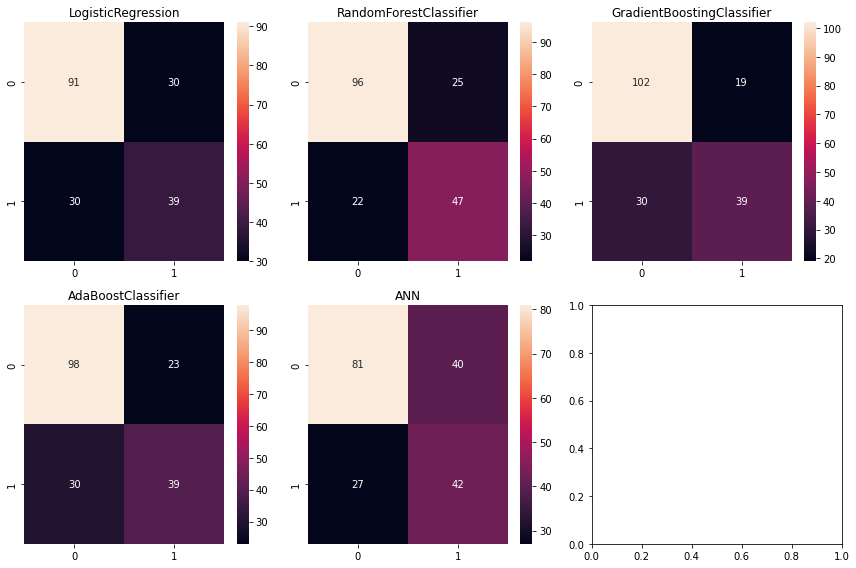

In [13]:
# plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
sns.heatmap(confusion_matrices[0][1], annot=True, fmt='d', ax=axes[0][0])
axes[0][0].title.set_text(confusion_matrices[0][0])

sns.heatmap(confusion_matrices[1][1], annot=True, fmt='d', ax=axes[0][1])
axes[0][1].title.set_text(confusion_matrices[1][0])

sns.heatmap(confusion_matrices[2][1], annot=True, fmt='d', ax=axes[0][2])
axes[0][2].title.set_text(confusion_matrices[2][0])

sns.heatmap(confusion_matrices[3][1], annot=True, fmt='d', ax=axes[1][0])
axes[1][0].title.set_text(confusion_matrices[3][0])

sns.heatmap(confusion_matrices[4][1], annot=True, fmt='d', ax=axes[1][1])
axes[1][1].title.set_text(confusion_matrices[4][0])


plt.tight_layout()
plt.show()

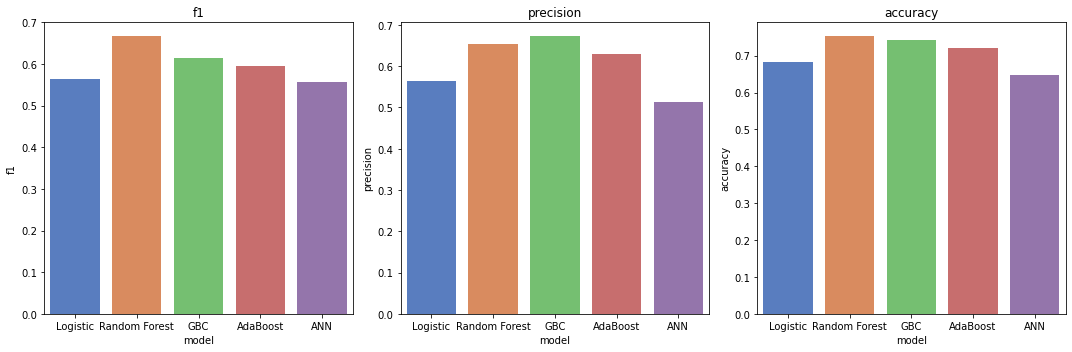

In [14]:
# plot performance metrics
metrics = pd.DataFrame(metrics)
metrics['model'].replace({'LogisticRegression': 'Logistic', 'GradientBoostingClassifier': 'GBC', 'AdaBoostClassifier': 'AdaBoost',\
                    'RandomForestClassifier': 'Random Forest'}, inplace=True)
fig, axes = plt.subplots(1, 3, figsize=(15,5))

sns.barplot(data=metrics, x='model', y='f1', ax=axes[0], palette='muted')
axes[0].title.set_text('f1')

sns.barplot(data=metrics, x='model', y='precision', ax=axes[1], palette='muted')
axes[1].title.set_text('precision')

sns.barplot(data=metrics, x='model', y='accuracy', ax=axes[2], palette='muted')
axes[2].title.set_text('accuracy')

plt.tight_layout()
plt.show()

Gradient Boosting Classifier (GGC), AdaBoost and Random Forest, and ANN are all performing well. Random Forest and GBC are the best-performing, with Random Forest achieving the highest f-1 score. 

I'd like to try to get the scores higher than they currently are, and have two approaches I'll be using. Because the dataset is imbalanced (there are many more loan rejections than approvals), I'll even out the dataset by using Synthetic Minority Oversampling Technique, or SMOTE. SMOTE is well-known technique that generates synthetic instances of the minority class. It is often paired with random undersampling of the majority class, but I will not take this approach as my data is already so limited. 

After using SMOTE to oversample the minority class, I'll perform a grid search to tune the parameters for the highest performing model.

# SMOTE

In [15]:
from imblearn.over_sampling import SMOTE

# oversample minority class in training data
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [16]:
# initialize lists to store performance metrics and confusion matrices
metrics2 = []
confusion_matrices2 = []

# initialize sklearn classifiers and store in list, add ann
classifiers = [RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, \
                                     min_samples_split=2, random_state=42), 
              GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, criterion='friedman_mse', \
                                         min_samples_split=2, random_state=42),\
              AdaBoostClassifier(n_estimators=100, learning_rate=.9, random_state=42),
              ann]

# train classifiers
for clf in classifiers:
    # if statement to handle predictions generated by ANN 
    if type(clf).__name__ == 'Sequential':
        # train ANN
        clf.fit(x_train_res, y_train_res, batch_size=32, epochs=100)
        # make predictions
        preds = clf.predict(x_val)
        # round predictions and convert to single numpy array
        preds = [np.round(pred) for pred in preds]
        preds = np.concatenate(preds, axis=0)
        preds = [int(pred) for pred in preds]
        preds = np.array(preds)
        # save metrics
        f1 = f1_score(y_val, preds)
        precision = precision_score(y_val, preds)
        accuracy = accuracy_score(y_val, preds)
        scores = {'model': 'ANN', 'f1': f1, 'precision': precision, 'accuracy': accuracy}
        metrics2.append(scores)
        # save confusion matrix
        cm = confusion_matrix(y_val, preds)
        confusion_matrices2.append(('ANN', cm))
        
    else:
        # train classifier
        clf.fit(x_train_res, y_train_res)
        # make predictions
        preds = clf.predict(x_val)
        # save metrics
        f1 = f1_score(y_val, preds)
        precision = precision_score(y_val, preds)
        accuracy = accuracy_score(y_val, preds)
        scores = {'model': type(clf).__name__, 'f1': f1, 'precision': precision, 'accuracy': accuracy}
        metrics2.append(scores)
        # save confusion matrix
        cm = confusion_matrix(y_val, preds)
        confusion_matrices2.append((type(clf).__name__, cm))

Epoch 1/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5362 - precision: 0.7480
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5351 - precision: 0.7568
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5300 - precision: 0.7393
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5229 - precision: 0.7384
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5209 - precision: 0.7389
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.5245 - precision: 0.7379
Epoch 7/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5243 - precision: 0.7414
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 0.5265 - precision: 0.7360
Epoch 9/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5170 - precision: 0.7396
Epoch 10/100
31/31 [==============================] - 0s 3ms/step - loss: 0.5192 - precision: 0.7356

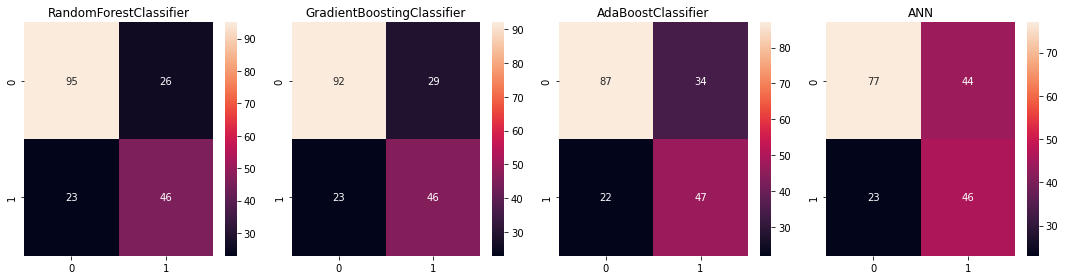

In [17]:
# plot confusion matrices
fig, axes = plt.subplots(1, 4, figsize=(15, 4))
sns.heatmap(confusion_matrices2[0][1], annot=True, fmt='d', ax=axes[0])
axes[0].title.set_text(confusion_matrices2[0][0])

sns.heatmap(confusion_matrices2[1][1], annot=True, fmt='d', ax=axes[1])
axes[1].title.set_text(confusion_matrices2[1][0])

sns.heatmap(confusion_matrices2[2][1], annot=True, fmt='d', ax=axes[2])
axes[2].title.set_text(confusion_matrices2[2][0])

sns.heatmap(confusion_matrices2[3][1], annot=True, fmt='d', ax=axes[3])
axes[3].title.set_text(confusion_matrices2[3][0])

plt.tight_layout()
plt.show()

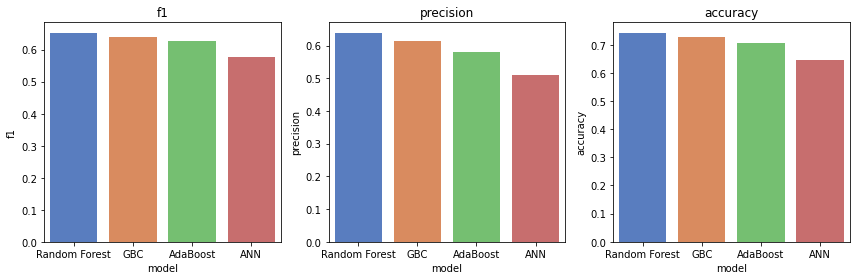

In [18]:
# plot performance metrics
metrics2 = pd.DataFrame(metrics2)
metrics2['model'].replace({'GradientBoostingClassifier': 'GBC', 'AdaBoostClassifier': 'AdaBoost',\
                    'RandomForestClassifier': 'Random Forest'}, inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.barplot(data=metrics2, x='model', y='f1', ax=axes[0], palette='muted')
axes[0].title.set_text('f1')

sns.barplot(data=metrics2, x='model', y='precision', ax=axes[1], palette='muted')
axes[1].title.set_text('precision')

sns.barplot(data=metrics2, x='model', y='accuracy', ax=axes[2], palette='muted')
axes[2].title.set_text('accuracy')

plt.tight_layout()
plt.show()

In [19]:
metrics

,model,f1,precision,accuracy
0,Logistic,0.565217,0.565217,0.684211
1,Random Forest,0.666667,0.652778,0.752632
2,GBC,0.614173,0.672414,0.742105
3,AdaBoost,0.595420,0.629032,0.721053
4,ANN,0.556291,0.512195,0.647368


In [20]:
metrics2

,model,f1,precision,accuracy
0,Random Forest,0.652482,0.638889,0.742105
1,GBC,0.638889,0.613333,0.726316
2,AdaBoost,0.626667,0.580247,0.705263
3,ANN,0.578616,0.511111,0.647368


SMOTE did not appear to significantly increase performance metrics. It may be that the dataset was not imbalanced enough to begin with for SMOTE to have a big impact. SMOTE is reported to have the best outcomes when paired with random undersampling of the majority class, but I am wary of reducing my already-small dataset. 

Although SMOTE did not add much value, we can see that Random Forest is the top ranking algorithm in both the original and resampled data. I'll use this algorithm moving forward and perform a grid search to tune its parameters on the original dataset.

# HyperParameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV
# create dict of params to pass to gridsearchcv
params = {'n_estimators': [50, 75, 100, 150], 'criterion': ['gini', 'entropy'], 'max_depth': [None, 1, 3, 5, 10],\
         'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3], 'random_state': [42]}

# initialize model and grid search object
rf = RandomForestClassifier()
clf = GridSearchCV(rf, params, scoring='f1')

# train model
clf.fit(x_train, y_train)

# check to get optimal params
clf.best_estimator_

RandomForestClassifier(criterion='entropy', random_state=42)

In [22]:
# initialize model with tuned parameters
rf = RandomForestClassifier(criterion='entropy', random_state=42)

# train model
rf.fit(x_train, y_train)
# calculate scoring metrics
preds = rf.predict(x_val)
f1 = f1_score(y_val, preds)
precision = precision_score(y_val, preds)
accuracy = accuracy_score(y_val, preds)
rf_scores = ['Tuned_RF', f1, precision, accuracy]

# add metrics to metrics2 df
metrics.loc[len(metrics2.index)] = rf_scores

[Text(0.5, 1.0, 'Tuned RF')]

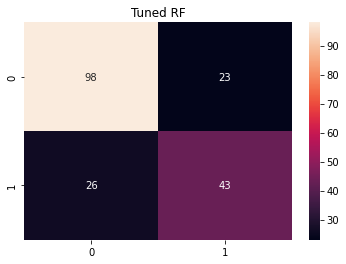

In [23]:
cm = confusion_matrix(y_val, preds)
sns.heatmap(cm, annot=True, fmt='d').set(title='Tuned RF')

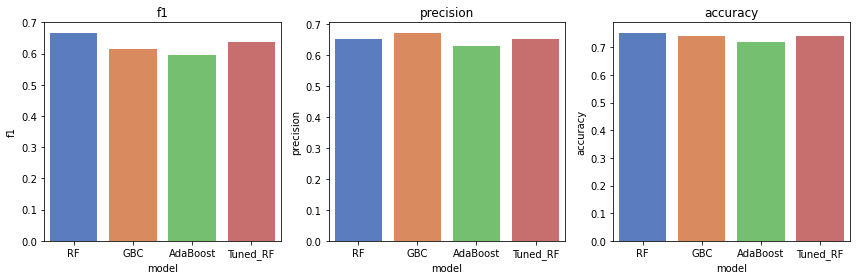

In [24]:
# plot performance metrics
metrics['model'].replace({'GradientBoostingClassifier': 'GBC', 'AdaBoostClassifier': 'AdaBoost',\
                    'Random Forest': 'RF'}, inplace=True)
# remove logistic regression 
metrics.drop(metrics.loc[metrics['model']=='Logistic'].index, inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

sns.barplot(data=metrics, x='model', y='f1', ax=axes[0], palette='muted')
axes[0].title.set_text('f1')

sns.barplot(data=metrics, x='model', y='precision', ax=axes[1], palette='muted')
axes[1].title.set_text('precision')

sns.barplot(data=metrics, x='model', y='accuracy', ax=axes[2], palette='muted')
axes[2].title.set_text('accuracy')

plt.tight_layout()
plt.show()

In [25]:
metrics

,model,f1,precision,accuracy
1,RF,0.666667,0.652778,0.752632
2,GBC,0.614173,0.672414,0.742105
3,AdaBoost,0.595420,0.629032,0.721053
4,Tuned_RF,0.637037,0.651515,0.742105


The tuned Random Forest classifier has a 3% reduction in f-1 score and a 1% reduction in accuracy. This is due to the fact that Sklearn's implementation of grid search includes cross validation, whereas my initial model was only trained on one sample of training data. Overall, we did not see an improvement in performance, but have confirmed this model's predictive power with minimal changes to the default implementation. 

To test how this model does on new data, let's test it on the test set we reserved when splitting our data.

In [27]:
# get predictions on test data
preds = rf.predict(x_test)
f1 = f1_score(y_test, preds)
precision = precision_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)
rf_scores = ['Tuned_RF_test', f1, precision, accuracy]

# add metrics to metrics2 df
metrics.loc[len(metrics.index)] = rf_scores
metrics

,model,f1,precision,accuracy
1,RF,0.666667,0.652778,0.752632
2,GBC,0.614173,0.672414,0.742105
3,AdaBoost,0.595420,0.629032,0.721053
4,Tuned_RF_test,0.585034,0.671875,0.743697


[Text(0.5, 1.0, 'Tuned RF')]

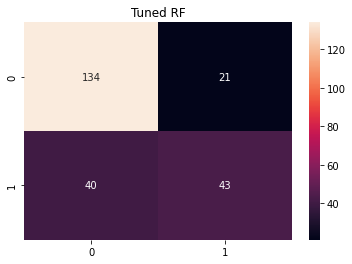

In [28]:
cm = confusion_matrix(y_test, preds)
sns.heatmap(cm, annot=True, fmt='d').set(title='Tuned RF')

Our model had a drop in its f-1 score, but is maintaining similar precision and accuracy. We know from the cross-validation in the tuning process that we can expect a higher f-1 score in general, but it did not perform as well on that metric in this test. Fortunately, the drop in f-1 is due to a higher occurence of Type II errors, which are less concerning for this application than Type I errors. For now, we will save the model for later use. 

In [31]:
import pickle

pickle.dump(rf, open('random_forest.pkl', 'wb'))